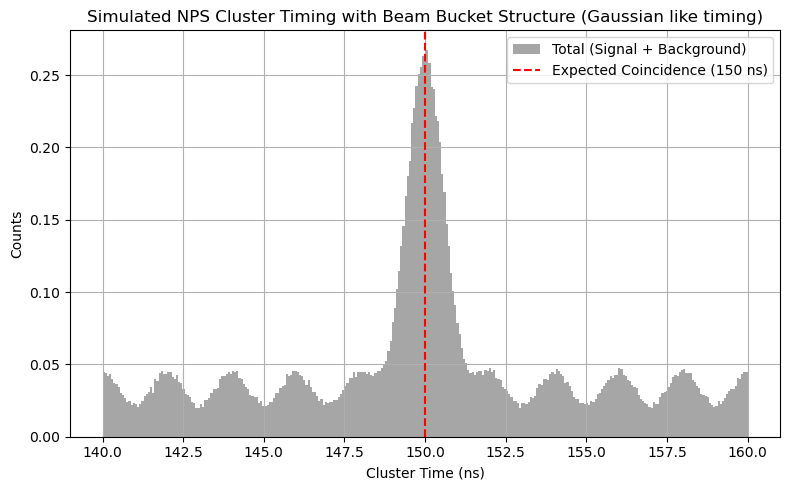

In [26]:
# Gaussian

import numpy as np
import matplotlib.pyplot as plt

# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
true_peak_time = 150.0           # ns, main coincidence
timing_resolution = 0.6          # ns (Gaussian sigma)
n_true_events = 80000             # Number of true coincidences
n_bg_per_bucket = 16000             # Background events per beam bucket

# === Simulate true coincidences ===
true_times = np.random.normal(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Gaussian like timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


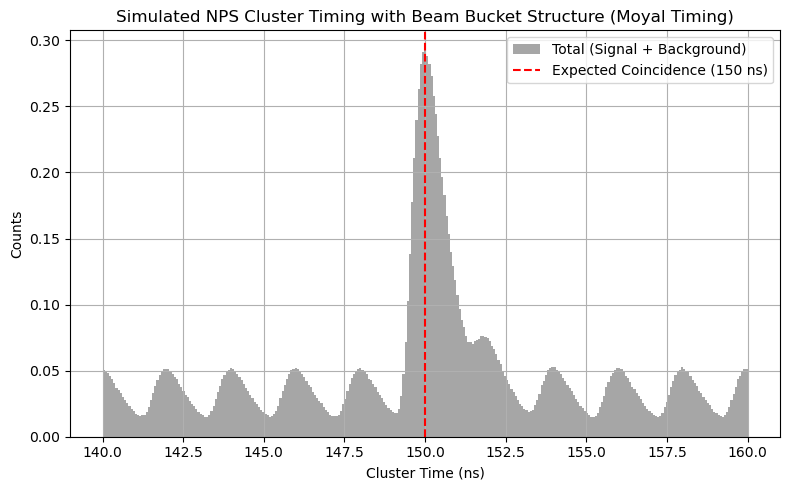

In [17]:
# Landau

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Parameters ===
# beam_bucket_spacing = 2.0        # ns
# n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
# true_peak_time = 150.0           # ns, main coincidence
# timing_resolution = 0.4          # ns (Gaussian sigma)
# n_true_events = 100000             # Number of true coincidences
# n_bg_per_bucket = 16000             # Background events per beam bucket

# === Fixed Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34         # ns
n_true_events = int(1000000 * 0.868)  # scale factor from data
n_bg_per_bucket = int(16000 * 10.568)        # from scale factor

# === Simulate true coincidences (Moyal ≈ Landau) ===
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Simulate background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = moyal.rvs(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8,5))
bins = np.linspace(140, 160, 300)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Moyal Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


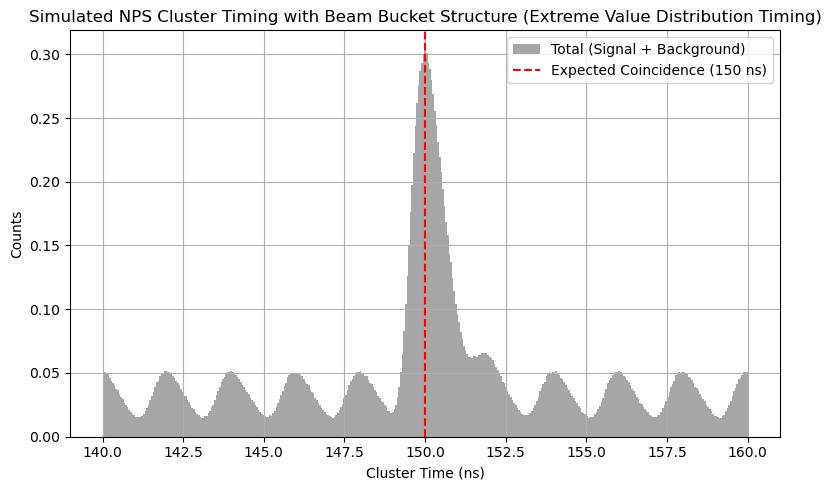

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# === Parameters ===
# beam_bucket_spacing = 2.0        # ns
# n_buckets = 200                  # Simulate +/- 200 buckets (~400 ns window)
# true_peak_time = 150.0           # ns, main coincidence
# n_true_events = 100000            # Number of true coincidences
# n_bg_per_bucket = 16000          # Background events per beam bucket


beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
# timing_resolution = 0.34          # ns
n_true_events = int(1000000 * 0.868)  # scale factors found by scaling to data; see exclusive_pi0.ipynb
n_bg_per_bucket = int(16000 * 10.568)

# === Gumbel Distribution Parameters ===
loc = 0.0                        # mean offset for timing jitter (will shift to t_peak)
scale = 0.5                      # controls timing spread and tail length

def gumbel_samples(t_center, size):
    """
    Generate cluster times from a Gumbel (Extreme Value) distribution centered at t_center.
    """
    return t_center + gumbel_r.rvs(loc=loc, scale=scale, size=size)

# === Simulate true coincidences ===
true_times = gumbel_samples(true_peak_time, size=n_true_events)

# === Simulate beam bucket background ===
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = gumbel_samples(t_bucket, size=n_bg_per_bucket)
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# === Combine signal and background ===
all_cluster_times = np.concatenate([true_times, bg_times])

# === Plot histogram ===
plt.figure(figsize=(8, 5))
bins = np.linspace(140, 160, 400)
plt.hist(all_cluster_times, bins=bins, density=True, color='gray', alpha=0.7, label='Total (Signal + Background)')
plt.axvline(true_peak_time, color='red', linestyle='--', label='Expected Coincidence (150 ns)')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Simulated NPS Cluster Timing with Beam Bucket Structure (Extreme Value Distribution Timing)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


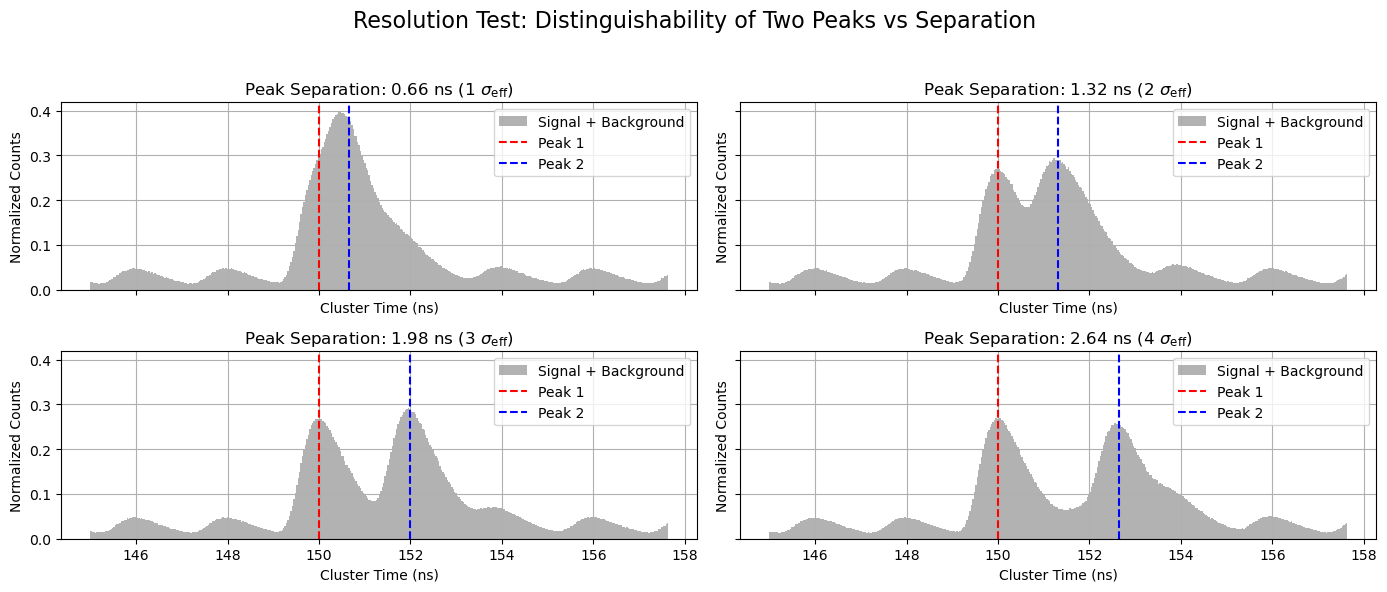

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Fixed Parameters ===
# beam_bucket_spacing = 2.0        # ns
# n_buckets = 200                  # +/- 200 buckets (~400 ns)
# main_peak_time = 150.0           # ns, main coincidence
# timing_resolution = 0.4          # ns (Moyal scale ~ Gaussian sigma)
# n_events_per_peak = 100000        # For each signal peak
# n_bg_per_bucket = 16000          # Background events per beam bucket

beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34          # ns
n_events_per_peak = int(1000000 * 0.868)  # scale factors found by scaling to data; see exclusive_pi0.ipynb
n_bg_per_bucket = int(16000 * 10.568)

# === Peak Separation to Test ===
peak_separations = [0.66, 1.32, 1.98, 2.64]  # ns between the two peaks

# === Loop Over Separations ===
fig, axs = plt.subplots(2, 2, figsize=(14, 6), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = moyal.rvs(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = moyal.rvs(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = moyal.rvs(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.2f} ns ({i+1} $\\sigma_\\mathrm{{eff}}$)")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test: Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


FWHM ≈ 1.203 ns


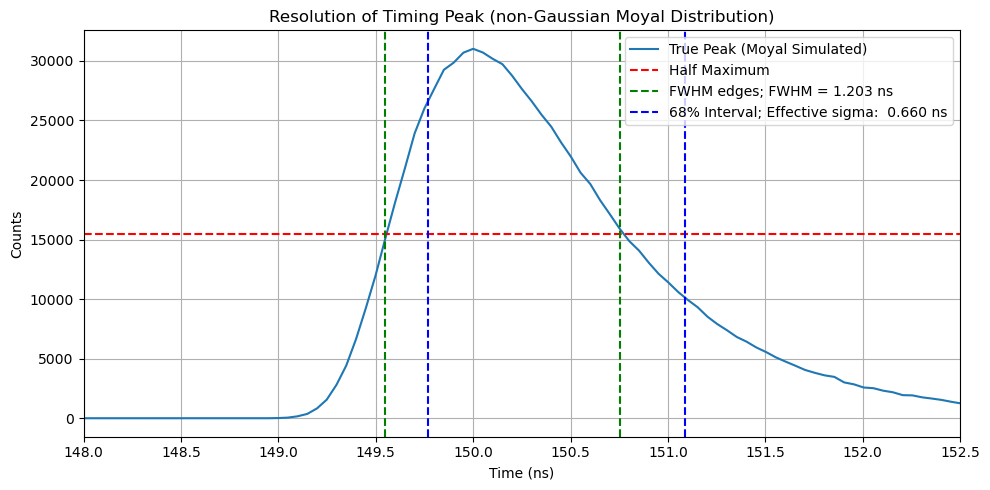

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal
from scipy.signal import find_peaks

# === Generate the Moyal Distribution (as before) ===
timing_resolution = 0.34
true_peak_time = 150.0
n_true_events = int(1000000 * 0.868)  # scale factor from data
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Histogram ===
bins = np.linspace(140, 160, 400)
hist, bin_edges = np.histogram(true_times, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# === Find the Peak ===
peak_index = np.argmax(hist)
peak_height = hist[peak_index]
half_max = peak_height / 2

# === Find FWHM ===
# Find where the curve crosses the half-max value
above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

# === Find effective sigma (width of the central 68% interval) ===
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2

if len(crossing_indices) >= 2:
    left_idx, right_idx = crossing_indices[0], crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"FWHM ≈ {fwhm:.3f} ns")

    # === Plot with FWHM marked ===
    plt.figure(figsize=(10,5))
    plt.plot(bin_centers, hist, label="True Peak (Moyal Simulated)")
    plt.axhline(half_max, color="red", linestyle="--", label="Half Maximum")
    plt.axvline(bin_centers[left_idx], color="green", linestyle="--", label=f"FWHM edges; FWHM = {fwhm:.3f} ns")
    plt.axvline(bin_centers[right_idx], color="green", linestyle="--")
    plt.axvline(sorted_data[low_idx], color="blue", linestyle="--", label=f"68% Interval; Effective sigma: {effective_sigma: .3f} ns")
    plt.axvline(sorted_data[high_idx], color="blue", linestyle="--")
    plt.xlabel("Time (ns)")
    plt.ylabel("Counts")
    plt.xlim(148, 152.5)
    plt.title("Resolution of Timing Peak (non-Gaussian Moyal Distribution)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("FWHM could not be reliably determined.")


FWHM ≈ 1.203 ns
Effective Sigma ≈ 0.660 ns


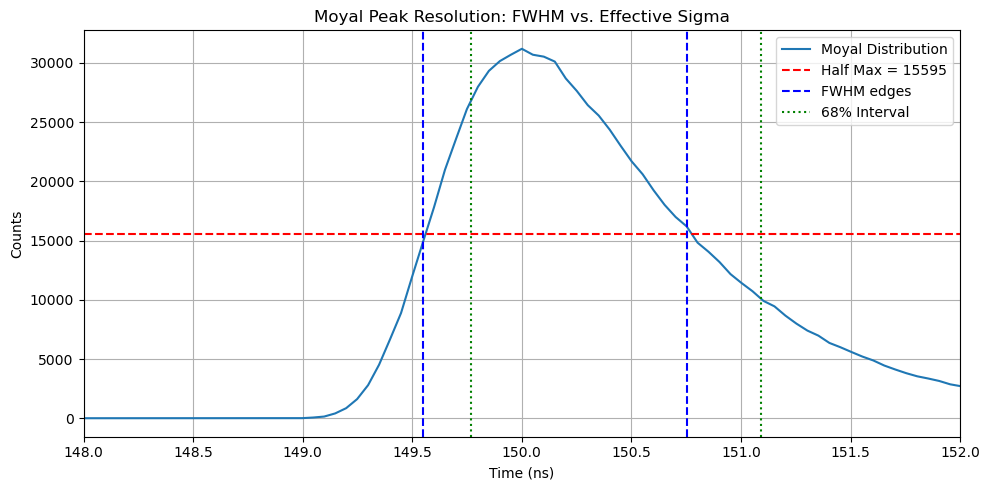

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moyal

# === Generate Moyal Distribution ===
timing_resolution = 0.34
true_peak_time = 150.0
n_true_events = int(1000000 * 0.868)
true_times = moyal.rvs(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# === Histogram ===
bins = np.linspace(140, 160, 400)
hist, bin_edges = np.histogram(true_times, bins=bins, density=False)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# === Peak and FWHM ===
peak_index = np.argmax(hist)
peak_height = hist[peak_index]
half_max = peak_height / 2

# Find indices where it crosses half max
above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

# === Effective Sigma (central 68% interval) ===
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2

# === Plot ===
if len(crossing_indices) >= 2:
    left_idx, right_idx = crossing_indices[0], crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"FWHM ≈ {fwhm:.3f} ns")
    print(f"Effective Sigma ≈ {effective_sigma:.3f} ns")

    plt.figure(figsize=(10, 5))
    plt.plot(bin_centers, hist, label="Moyal Distribution")
    
    # FWHM markers
    plt.axhline(half_max, color="red", linestyle="--", label=f"Half Max = {half_max:.0f}")
    plt.axvline(bin_centers[left_idx], color="blue", linestyle="--", label="FWHM edges")
    plt.axvline(bin_centers[right_idx], color="blue", linestyle="--")

    # Effective sigma markers
    plt.axvline(sorted_data[low_idx], color="green", linestyle=":", label=f"68% Interval")
    plt.axvline(sorted_data[high_idx], color="green", linestyle=":")

    plt.xlabel("Time (ns)")
    plt.ylabel("Counts")
    plt.title("Moyal Peak Resolution: FWHM vs. Effective Sigma")
    plt.xlim(148, 152)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("FWHM could not be reliably determined.")


In [37]:
sorted_data = np.sort(true_times)
low_idx = int(0.16 * len(sorted_data))
high_idx = int(0.84 * len(sorted_data))
width_68 = sorted_data[high_idx] - sorted_data[low_idx]
effective_sigma = width_68 / 2
print(effective_sigma)

0.7763522665925251


Numerical FWHM ≈ 1.3779 ns


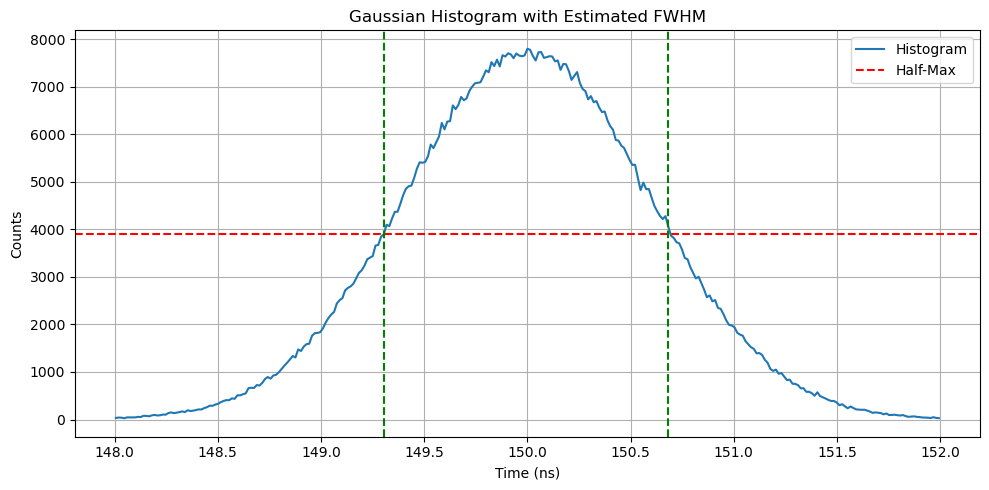

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# === Simulate Gaussian data ===
mu = 150.0        # ns, peak position
sigma = 0.6       # ns, Gaussian std dev
# n_events = 100000
n_true_events = int(1000000 * 0.868)  # scale factor from data
data = np.random.normal(loc=mu, scale=sigma, size=n_true_events)

# === Histogram ===
bins = np.linspace(148, 152, 300)
hist, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# === Estimate FWHM numerically ===
max_val = np.max(hist)
half_max = 0.5 * max_val

above_half_max = hist >= half_max
crossing_indices = np.where(np.diff(above_half_max.astype(int)) != 0)[0]

if len(crossing_indices) >= 2:
    left_idx = crossing_indices[0]
    right_idx = crossing_indices[-1]
    fwhm = bin_centers[right_idx] - bin_centers[left_idx]
    print(f"Numerical FWHM ≈ {fwhm:.4f} ns")
else:
    print("Warning: Could not determine FWHM reliably.")

# === Plot ===
plt.figure(figsize=(10,5))
plt.plot(bin_centers, hist, label='Histogram')
plt.axhline(half_max, color='red', linestyle='--', label='Half-Max')
plt.axvline(bin_centers[left_idx], color='green', linestyle='--')
plt.axvline(bin_centers[right_idx], color='green', linestyle='--')
plt.title("Gaussian Histogram with Estimated FWHM")
plt.xlabel("Time (ns)")
plt.ylabel("Counts")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


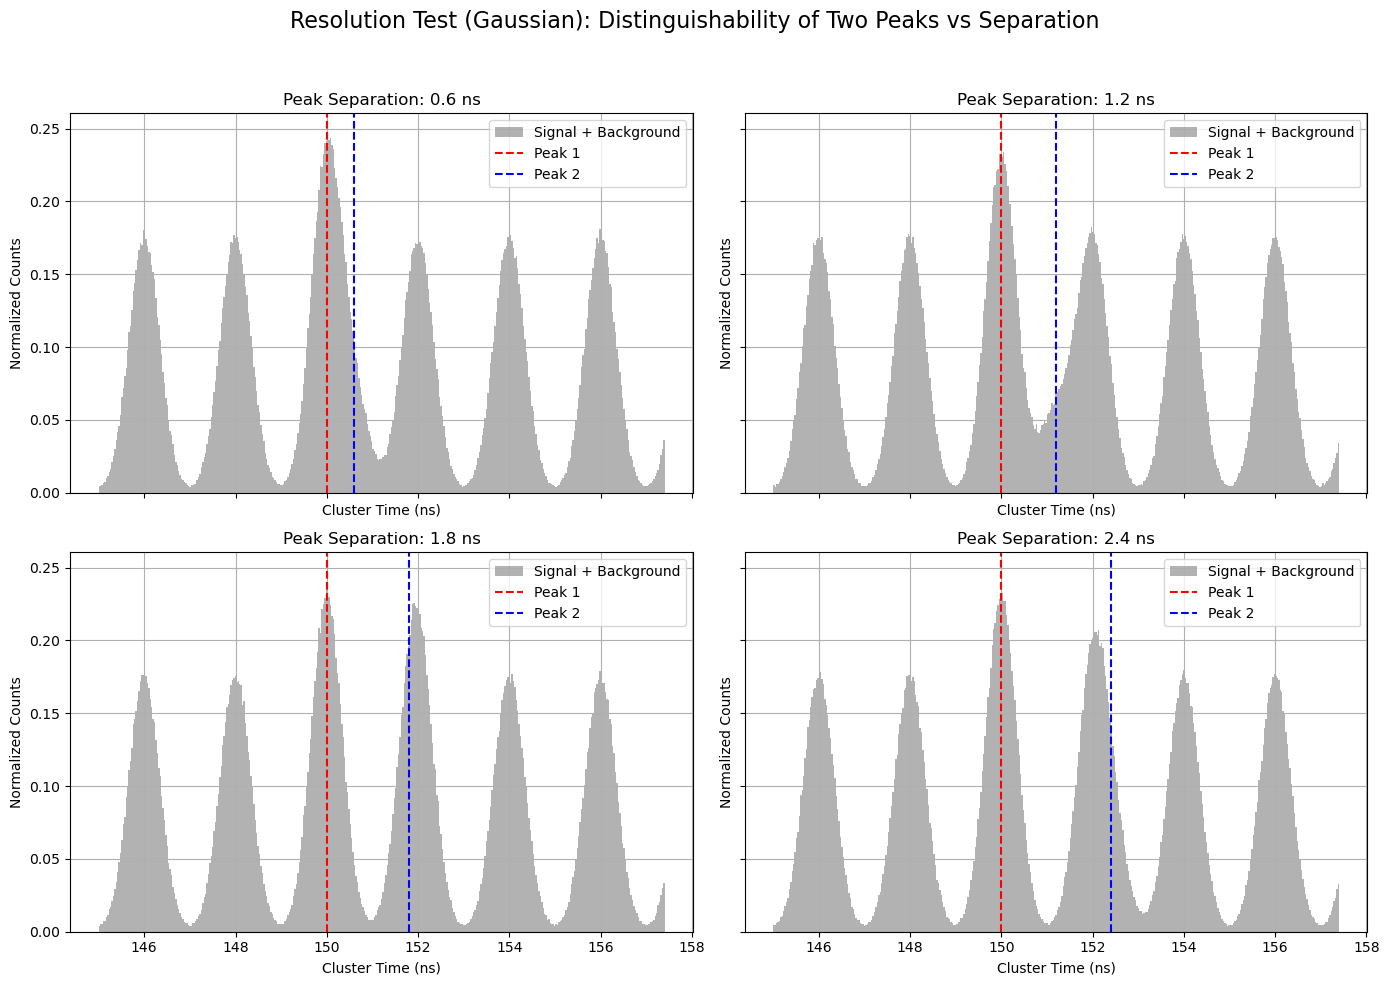

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# === Fixed Parameters ===
# === Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
true_peak_time = 150.0           # ns
timing_resolution = 0.34          # ns
n_true_events = 1000000 * 0.868  # scale factors found by scaling to data; see exclusive_pi0.ipynb
n_bg_per_bucket = 16000 * 10.568

# === Peak Separation to Test ===
peak_separations = [0.6, 1.2, 1.8, 2.4]  # ns between the two peaks

# === Loop Over Separations ===
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = np.random.normal(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = np.random.normal(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.1f} ns")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test (Gaussian): Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


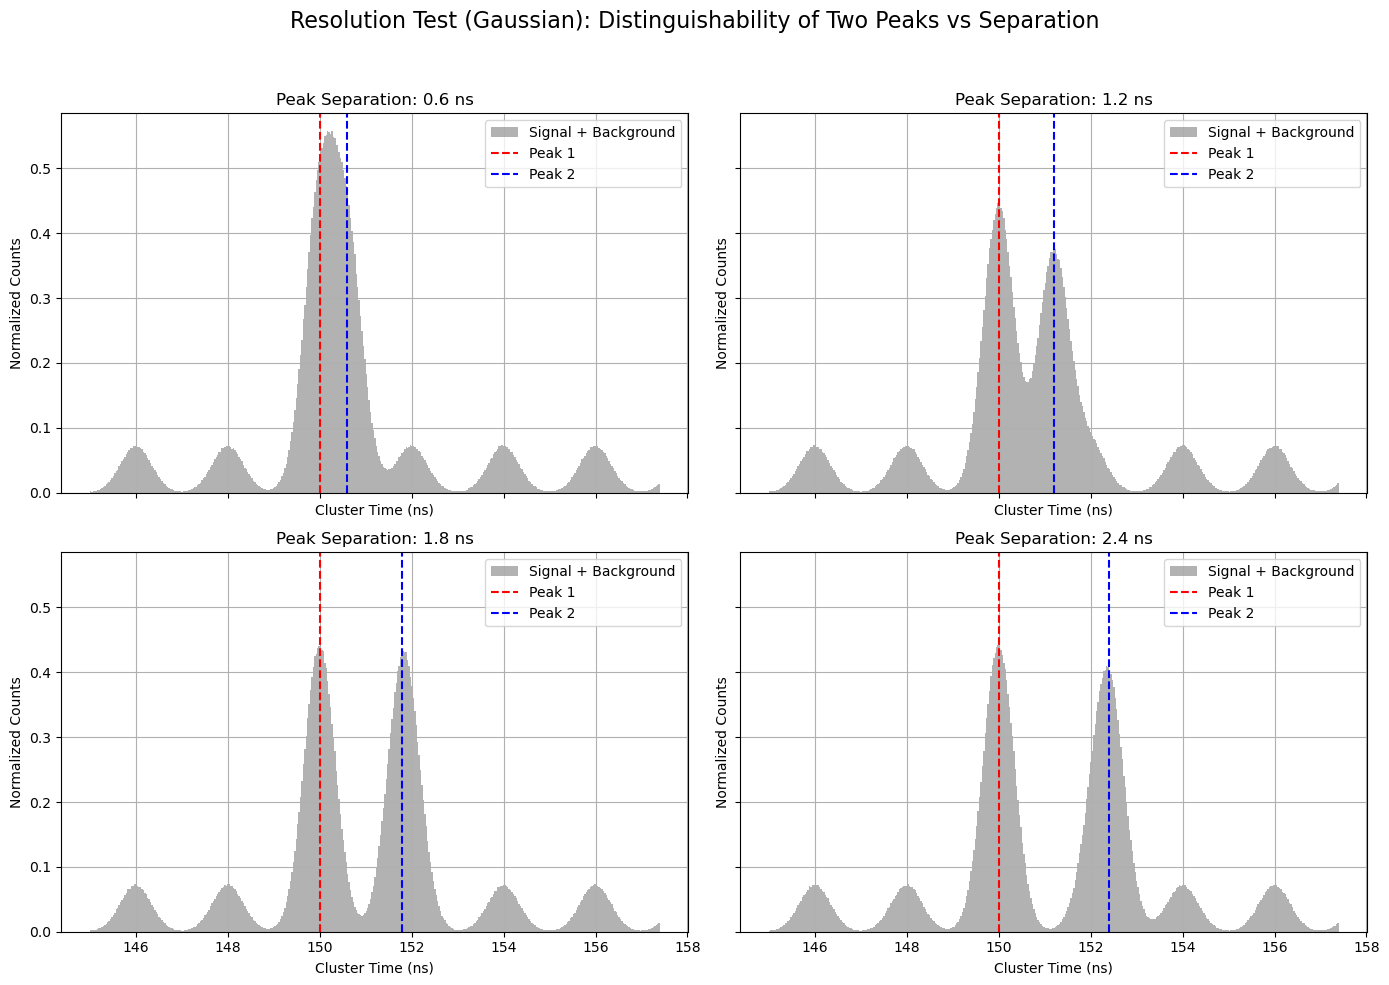

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# === Fixed Parameters ===
beam_bucket_spacing = 2.0        # ns
n_buckets = 200                  # +/- 400 ns window
main_peak_time = 150.0           # ns
timing_resolution = 0.34         # ns
n_total_true_events = int(1000000 * 0.868)  # scale factor from data
n_events_per_peak = n_total_true_events // 1  # split evenly between two peaks
n_bg_per_bucket = int(16000 * 10.568)        # from scale factor

# === Peak Separations to Test ===
peak_separations = [0.6, 1.2, 1.8, 2.4]  # ns between the two peaks

# === Plot Setup ===
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
axs = axs.flatten()

for i, dt in enumerate(peak_separations):
    second_peak_time = main_peak_time + dt

    # === Simulate signal peaks ===
    peak1 = np.random.normal(loc=main_peak_time, scale=timing_resolution, size=n_events_per_peak)
    peak2 = np.random.normal(loc=second_peak_time, scale=timing_resolution, size=n_events_per_peak)

    # === Simulate background ===
    bg_times = []
    for j in range(-n_buckets, n_buckets + 1):
        t_bucket = main_peak_time + j * beam_bucket_spacing
        bg = np.random.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket)
        bg_times.extend(bg)

    # === Combine all ===
    all_times = np.concatenate([peak1, peak2, bg_times])

    # === Plot ===
    axs[i].hist(all_times, bins=np.linspace(145, 155 + max(peak_separations), 400), density=True,
                color='gray', alpha=0.6, label='Signal + Background')
    axs[i].axvline(main_peak_time, color='red', linestyle='--', label='Peak 1')
    axs[i].axvline(second_peak_time, color='blue', linestyle='--', label='Peak 2')
    axs[i].set_title(f"Peak Separation: {dt:.1f} ns")
    axs[i].set_xlabel("Cluster Time (ns)")
    axs[i].set_ylabel("Normalized Counts")
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Resolution Test (Gaussian): Distinguishability of Two Peaks vs Separation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


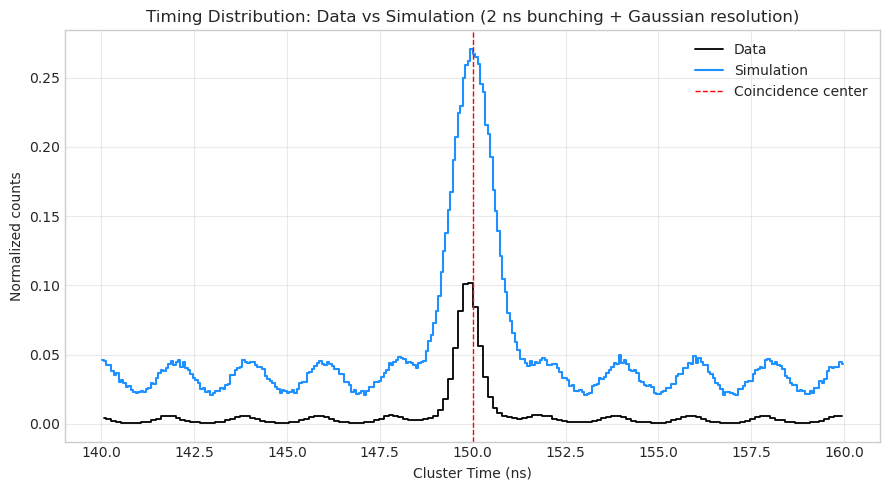

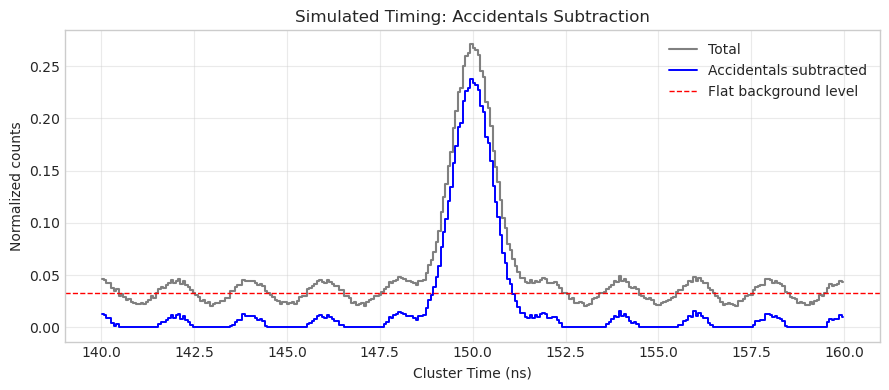

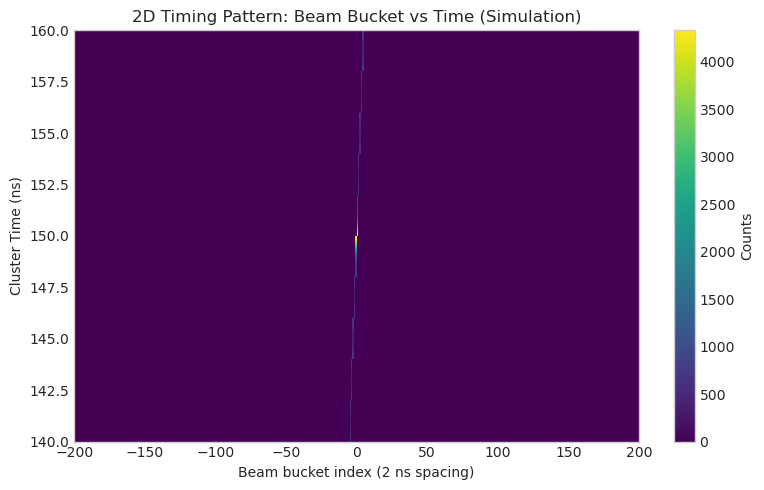

=== Summary ===
True coincidences: 80000
Background per bucket: 16000 (total ~6,416,000)
Total simulated events: 6,496,000
Timing resolution (σ): 0.6 ns
Flat background fraction in window (140–160 ns): 98.77%


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# =====================================================
# 1. Parameters
# =====================================================
beam_bucket_spacing = 2.0       # ns
n_buckets = 200                 # +/- 200 buckets (~400 ns window)
true_peak_time = 150.0          # ns (main coincidence)
timing_resolution = 0.6         # ns (detector timing sigma)
n_true_events = 8e4             # true coincidences
n_bg_per_bucket = 1.6e4         # background per beam bucket
hist_range = (140, 160)         # ns
n_bins = 300

# =====================================================
# 2. Simulate true coincidences
# =====================================================
true_times = np.random.normal(
    loc=true_peak_time, scale=timing_resolution, size=int(n_true_events)
)

# =====================================================
# 3. Simulate background (accidentals)
# =====================================================
bg_times = []
for i in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + i * beam_bucket_spacing
    bg_cluster_times = np.random.normal(
        loc=t_bucket, scale=timing_resolution, size=int(n_bg_per_bucket)
    )
    bg_times.extend(bg_cluster_times)

bg_times = np.array(bg_times)

# =====================================================
# 4. Combine
# =====================================================
all_cluster_times = np.concatenate([true_times, bg_times])

# =====================================================
# 5. Load experimental data for comparison
# =====================================================
data = np.load("cluster_timing_histograms_best_candidate.npz", allow_pickle=True)
centers = data["centers_bc"]
counts = data["counts_bc"].astype(float)
counts /= np.sum(counts)  # normalize
mask = (centers > hist_range[0]) & (centers < hist_range[1])
centers, counts = centers[mask], counts[mask]

# =====================================================
# 6. Histogram simulated data
# =====================================================
hist_sim, bins = np.histogram(all_cluster_times, bins=n_bins, range=hist_range, density=True)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# =====================================================
# 7. Normalize and compare 1D
# =====================================================
plt.figure(figsize=(9, 5))
plt.step(centers, counts, where='mid', color='k', lw=1.3, label='Data')
plt.step(bin_centers, hist_sim, where='mid', color='dodgerblue', lw=1.5, label='Simulation')
plt.axvline(true_peak_time, color='r', linestyle='--', lw=1.0, label='Coincidence center')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Normalized counts")
plt.title("Timing Distribution: Data vs Simulation (2 ns bunching + Gaussian resolution)")
plt.legend(frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# =====================================================
# 8. Accidental subtraction (simulation)
# =====================================================
# Estimate background level away from coincidence
bg_mask = (bin_centers < 147) | (bin_centers > 153)
bg_level = np.mean(hist_sim[bg_mask])
hist_sub = hist_sim - bg_level
hist_sub[hist_sub < 0] = 0

plt.figure(figsize=(9, 4))
plt.step(bin_centers, hist_sim, where='mid', color='gray', label='Total')
plt.step(bin_centers, hist_sub, where='mid', color='blue', lw=1.4, label='Accidentals subtracted')
plt.axhline(bg_level, color='r', ls='--', lw=1.0, label='Flat background level')
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Normalized counts")
plt.title("Simulated Timing: Accidentals Subtraction")
plt.legend(frameon=False)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# =====================================================
# 9. 2D histogram (simulation)
# =====================================================
# Show time vs beam bucket index (for visualizing bunch pattern)
bucket_indices = np.floor((all_cluster_times - true_peak_time) / beam_bucket_spacing).astype(int)
plt.figure(figsize=(8, 5))
plt.hist2d(bucket_indices, all_cluster_times, bins=(400, 300),
           range=[(-200, 200), hist_range], cmap="viridis", norm=None)
plt.xlabel("Beam bucket index (2 ns spacing)")
plt.ylabel("Cluster Time (ns)")
plt.title("2D Timing Pattern: Beam Bucket vs Time (Simulation)")
plt.colorbar(label="Counts")
plt.tight_layout()
plt.show()

# =====================================================
# 10. Print summary
# =====================================================
print("=== Summary ===")
print(f"True coincidences: {int(n_true_events)}")
print(f"Background per bucket: {int(n_bg_per_bucket)} (total ~{len(bg_times):,})")
print(f"Total simulated events: {len(all_cluster_times):,}")
print(f"Timing resolution (σ): {timing_resolution} ns")
print(f"Flat background fraction in window ({hist_range[0]}–{hist_range[1]} ns): "
      f"{(len(bg_times)/len(all_cluster_times))*100:.2f}%")


Loaded NPZ: cluster_timing_histograms_best_candidate.npz  |  bins: 150, range: (140.0, 160.0)
Data total counts (window): 141,314
Sim raw total counts: 240,068
Scale factor (integral): 0.5886
Scale factor (peak)    : 1.6631


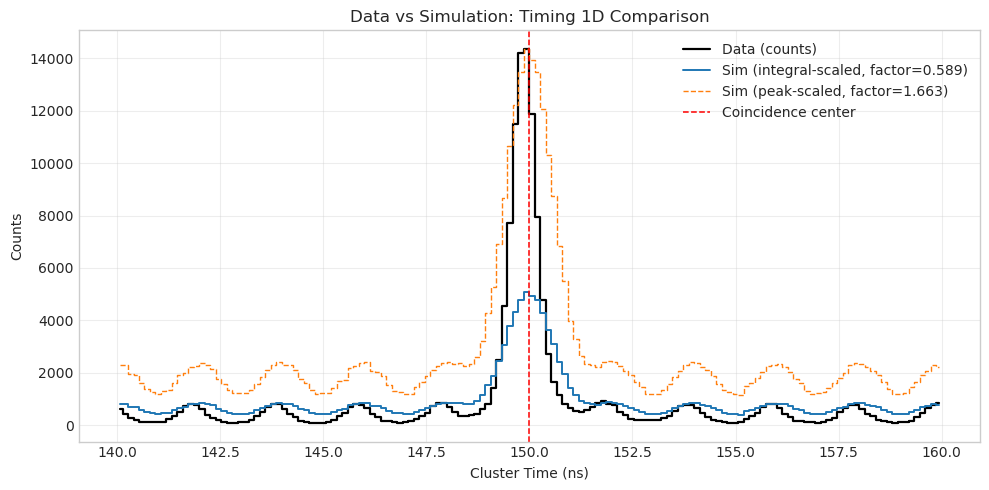

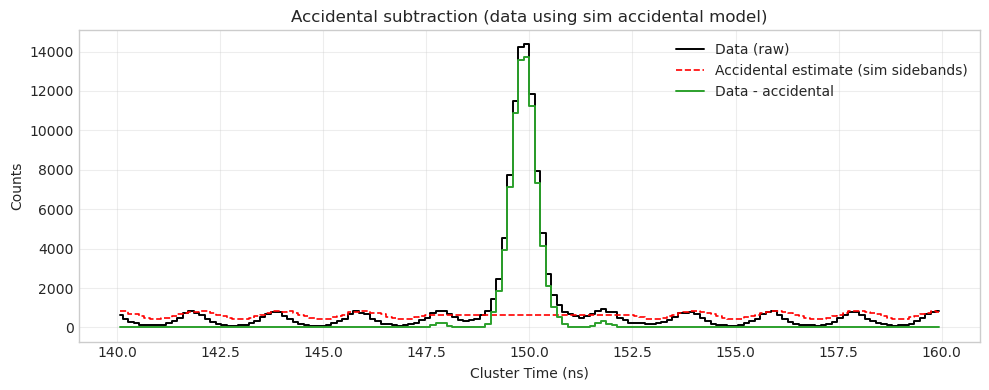

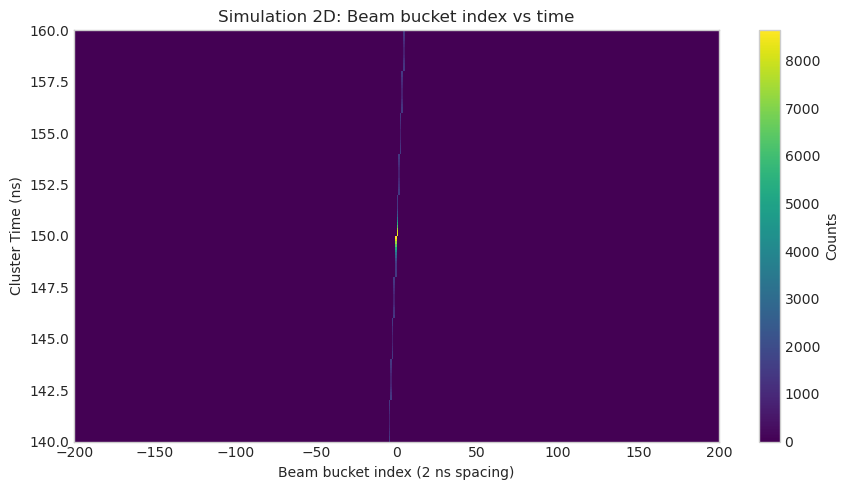

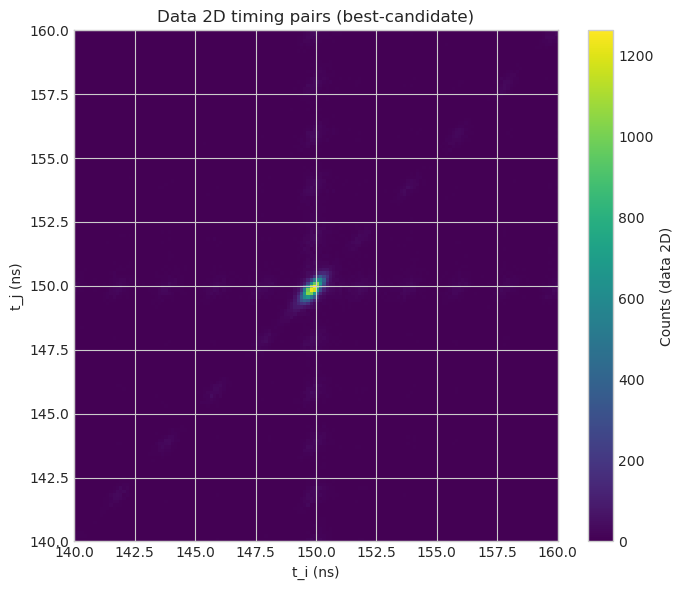

=== Diagnostic (central window) ===
Chi2: 75919.90, ndf ~ 75, chi2/ndf = 1012.27

=== Summary ===
Data counts (window): 141314
Sim raw counts (window): 240068
Sim scaled (integral) total: 141314
Sim scaled (peak) total: 399251
Estimated background per-sideband-bin mean (sim): 619.650


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------------
# Simulation parameters (tweakable)
# ------------------------------
beam_bucket_spacing = 2.0       # ns
n_buckets = 200                 # +/- buckets to cover window
true_peak_time = 150.0          # ns (coincidence center)
timing_resolution = 0.6         # ns (detector sigma)
n_true_events = int(8e4)        # number of true coincidences to simulate
n_bg_per_bucket = int(1.6e4)    # background clusters per bucket (simulated)

# ------------------------------
# Load experimental histogram (must contain counts_bc, centers_bc, hist_min, hist_max, n_bins)
# ------------------------------
npz_file = "cluster_timing_histograms_best_candidate.npz"
data = np.load(npz_file, allow_pickle=True)
if not {"counts_bc", "centers_bc", "hist_min", "hist_max", "n_bins"}.issubset(set(data.keys())):
    raise RuntimeError(f"{npz_file} missing required keys. Keys: {list(data.keys())}")

data_counts = data["counts_bc"].astype(float)   # raw counts per bin (we assume they are counts)
data_centers = data["centers_bc"]
hist_min = float(data["hist_min"])
hist_max = float(data["hist_max"])
n_bins = int(data["n_bins"])
edges = np.linspace(hist_min, hist_max, n_bins + 1)
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# If data_centers differ from bin_centers, prefer bin_centers from file edges
# but we'll align by bin centers for plotting
print(f"Loaded NPZ: {npz_file}  |  bins: {n_bins}, range: ({hist_min}, {hist_max})")
print(f"Data total counts (window): {np.sum(data_counts):,.0f}")

# ------------------------------
# Simulate: true coincidences + bucketed background
# ------------------------------
rng = np.random.default_rng(seed=42)

true_times = rng.normal(loc=true_peak_time, scale=timing_resolution, size=n_true_events)

# Background: populate each bucket with gaussian jitter around bucket center
bg_times = []
for ib in range(-n_buckets, n_buckets + 1):
    t_bucket = true_peak_time + ib * beam_bucket_spacing
    # if n_bg_per_bucket is large, generate in chunks for memory; here it's fine
    bg_times.append(rng.normal(loc=t_bucket, scale=timing_resolution, size=n_bg_per_bucket))
bg_times = np.concatenate(bg_times)

# Combine
sim_times = np.concatenate([true_times, bg_times])

# ------------------------------
# Histogram simulation with same bins as data (counts, not density)
# ------------------------------
sim_counts_raw, _ = np.histogram(sim_times, bins=edges)
print(f"Sim raw total counts: {sim_counts_raw.sum():,}")

# ------------------------------
# Compute scaling factors to match data
# ------------------------------
# Option A: match integral (total counts in window)
scale_integral = np.sum(data_counts) / np.sum(sim_counts_raw)

# Option B: match peak bin height
data_peak = np.max(data_counts)
sim_peak = np.max(sim_counts_raw)
scale_peak = (data_peak / sim_peak) if sim_peak > 0 else 1.0

print(f"Scale factor (integral): {scale_integral:.4f}")
print(f"Scale factor (peak)    : {scale_peak:.4f}")

# Choose default scaling strategy: match integral (safer for total counts)
sim_counts_scaled = sim_counts_raw * scale_integral

# Also build a peak-scaled version for comparison
sim_counts_peak_scaled = sim_counts_raw * scale_peak

# Convert raw sim histogram to normalized (for shape comparison) if desired
sim_density = sim_counts_raw / np.sum(sim_counts_raw)
data_density = data_counts / np.sum(data_counts)

# ------------------------------
# Plot 1D: Data vs Sim (integral-scaled and peak-scaled)
# ------------------------------
plt.figure(figsize=(10,5))
plt.step(bin_centers, data_counts, where="mid", color="k", lw=1.6, label="Data (counts)")
plt.step(bin_centers, sim_counts_scaled, where="mid", color="C0", lw=1.4, label=f"Sim (integral-scaled, factor={scale_integral:.3f})")
plt.step(bin_centers, sim_counts_peak_scaled, where="mid", color="C1", lw=1.0, ls="--", label=f"Sim (peak-scaled, factor={scale_peak:.3f})")
plt.axvline(true_peak_time, color="r", lw=1.1, ls="--", label="Coincidence center")
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Data vs Simulation: Timing 1D Comparison")
plt.legend(frameon=False, fontsize=10)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

# ------------------------------
# Accidental estimate & subtraction (using simulation background)
# - We'll use sim background distribution estimate by subtracting the true-peaked component.
# - Sim background per-bin estimate: sim_counts_raw - (sim_true_component)
#   But since simulated true_times were only at central bucket, an easier approach:
#     - Estimate background from simulation by zeroing out central region (peak window)
#     - Interpolate / use average background level vs bin as accidental model
# For simplicity: estimate background as sim_counts_scaled but masked at central window,
# then smooth / use local average as accidental model.
# ------------------------------
# Define a central peak window to protect (e.g., +/- 2 ns around true_peak_time)
peak_window = 2.5  # ns
peak_mask = (bin_centers >= (true_peak_time - peak_window)) & (bin_centers <= (true_peak_time + peak_window))

# Estimate background level per bin from sim (exclude peak window)
bg_est_per_bin = np.copy(sim_counts_scaled)
bg_est_per_bin[peak_mask] = np.nan
# Fill NaN with local average (here global mean over sidebands)
bg_side_mean = np.nanmean(bg_est_per_bin)
bg_est_per_bin[np.isnan(bg_est_per_bin)] = bg_side_mean

# Subtract accidental estimate from data
data_sub = data_counts - bg_est_per_bin
data_sub[data_sub < 0] = 0.0  # clamp negative after subtraction

# Also show sim-subtracted (to verify)
sim_sub = sim_counts_scaled - bg_est_per_bin
sim_sub[sim_sub < 0] = 0.0

# ------------------------------
# Plot accidental subtraction result
# ------------------------------
plt.figure(figsize=(10,4))
plt.step(bin_centers, data_counts, where="mid", color="k", lw=1.4, label="Data (raw)")
plt.step(bin_centers, bg_est_per_bin, where="mid", color="r", lw=1.2, ls="--", label="Accidental estimate (sim sidebands)")
plt.step(bin_centers, data_sub, where="mid", color="C2", lw=1.4, label="Data - accidental")
plt.xlabel("Cluster Time (ns)")
plt.ylabel("Counts")
plt.title("Accidental subtraction (data using sim accidental model)")
plt.legend(frameon=False)
plt.grid(alpha=0.35)
plt.tight_layout()
plt.show()

# ------------------------------
# 2D visualization: bucket index vs time (simulation)
# ------------------------------
bucket_indices_sim = np.floor((sim_times - true_peak_time) / beam_bucket_spacing).astype(int)
fig = plt.figure(figsize=(9,5))
plt.hist2d(bucket_indices_sim, sim_times, bins=(400, n_bins),
           range=[(-n_buckets, n_buckets), (hist_min, hist_max)], cmap="viridis")
plt.xlabel("Beam bucket index (2 ns spacing)")
plt.ylabel("Cluster Time (ns)")
plt.title("Simulation 2D: Beam bucket index vs time")
plt.colorbar(label="Counts")
plt.tight_layout()
plt.show()

# ------------------------------
# 2D visualization: data 2D
# If you have 2D pair histogram (hist_bc maybe 2D), show it; otherwise show 1D vs bucket approximated
# We check for 'hist_bc' key (2D timing pairs) in NPZ and plot if present.
# ------------------------------
if "hist_bc" in data.files:
    hist2d_data = data["hist_bc"]  # assume shape (n_bins, n_bins)
    plt.figure(figsize=(7,6))
    plt.imshow(hist2d_data.T, origin="lower", extent=[hist_min, hist_max, hist_min, hist_max],
               aspect='auto', cmap='viridis')
    plt.colorbar(label="Counts (data 2D)")
    plt.xlabel("t_i (ns)")
    plt.ylabel("t_j (ns)")
    plt.title("Data 2D timing pairs (best-candidate)")
    plt.tight_layout()
    plt.show()
else:
    print("No 2D timing pair histogram 'hist_bc' found in NPZ; skipping data 2D plot.")

# ------------------------------
# Quick goodness-of-fit diagnostics (chi2 between data and sim in central window)
# ------------------------------
# Compare in a +/- window around peak (e.g., ±5 ns)
diag_mask = (bin_centers >= (true_peak_time - 5)) & (bin_centers <= (true_peak_time + 5))
obs = data_counts[diag_mask]
exp = sim_counts_scaled[diag_mask]
# avoid zeros
exp = np.where(exp <= 0, 1e-6, exp)
chi2 = np.sum((obs - exp)**2 / exp)
ndf = np.sum(diag_mask) - 1
print("=== Diagnostic (central window) ===")
print(f"Chi2: {chi2:.2f}, ndf ~ {ndf}, chi2/ndf = {chi2/ndf:.2f}")

# ------------------------------
# Summary prints
# ------------------------------
print("\n=== Summary ===")
print(f"Data counts (window): {np.sum(data_counts):.0f}")
print(f"Sim raw counts (window): {np.sum(sim_counts_raw):.0f}")
print(f"Sim scaled (integral) total: {np.sum(sim_counts_scaled):.0f}")
print(f"Sim scaled (peak) total: {np.sum(sim_counts_peak_scaled):.0f}")
print(f"Estimated background per-sideband-bin mean (sim): {bg_side_mean:.3f}")


Fitted: n_true_events = 8971, n_bg_per_bucket = 471


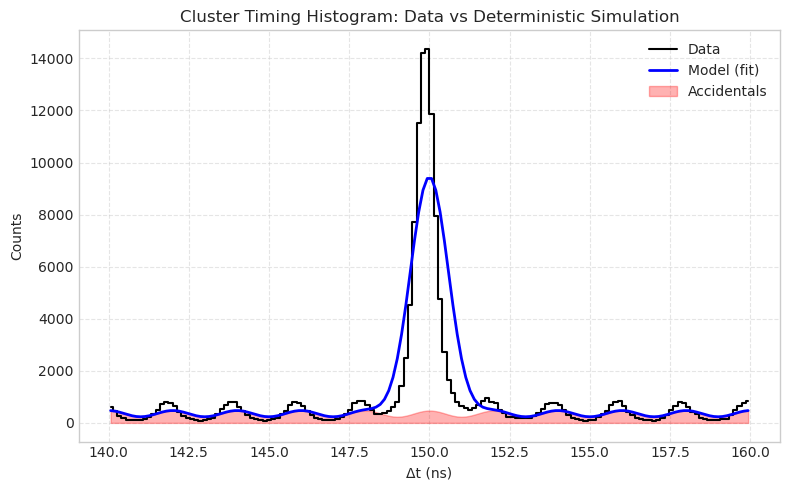

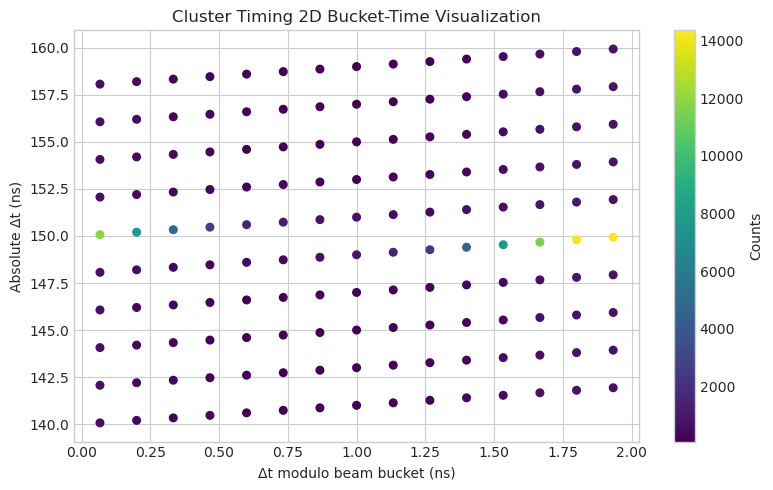

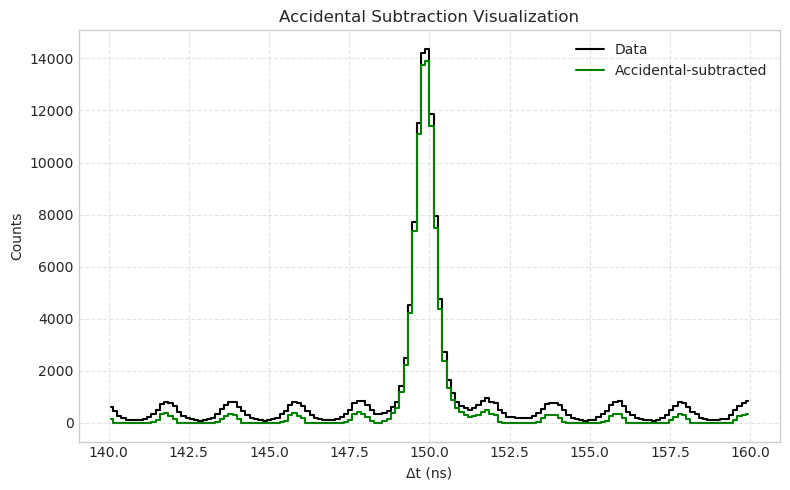

Total data events: 141314
Estimated accidentals: 53153
Estimated true coincidences: 96569


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# =======================
# Load data histogram
# =======================
data_npz = np.load("cluster_timing_histograms_best_candidate.npz", allow_pickle=True)
counts_data = data_npz["counts_bc"]
centers = data_npz["centers_bc"]
bin_width = centers[1] - centers[0]

# =======================
# Parameters
# =======================
beam_spacing = 2.0        # ns
n_buckets = 200           # +/- buckets to simulate
timing_resolution = 0.6   # ns
true_peak_time = 150.0    # ns, main coincidence

# =======================
# Model function
# =======================
def histogram_model(x, n_true, n_bg):
    """Deterministic expected counts in each histogram bin."""
    # True peak (single Gaussian)
    true_peak = n_true * np.exp(-0.5 * ((x - true_peak_time)/timing_resolution)**2)
    
    # Accidental background: sum over beam buckets
    bg = np.zeros_like(x)
    for i in range(-n_buckets, n_buckets+1):
        t_bucket = true_peak_time + i*beam_spacing
        bg += n_bg * np.exp(-0.5 * ((x - t_bucket)/timing_resolution)**2)
    
    return true_peak + bg

# =======================
# Fit model to data
# =======================
p0 = [np.max(counts_data), 1000]  # initial guess
popt, pcov = curve_fit(histogram_model, centers, counts_data, p0=p0)
n_true_fit, n_bg_fit = popt
print(f"Fitted: n_true_events = {n_true_fit:.0f}, n_bg_per_bucket = {n_bg_fit:.0f}")

# =======================
# Generate deterministic simulation
# =======================
counts_model = histogram_model(centers, n_true_fit, n_bg_fit)
accidentals = counts_model - n_true_fit*np.exp(-0.5*((centers-true_peak_time)/timing_resolution)**2)

# =======================
# 1D Comparison plot
# =======================
plt.figure(figsize=(8,5))
plt.step(centers, counts_data, where='mid', color='black', label="Data")
plt.plot(centers, counts_model, 'b-', lw=2, label="Model (fit)")
plt.fill_between(centers, 0, accidentals, color='red', alpha=0.3, label="Accidentals")
plt.xlabel("Δt (ns)")
plt.ylabel("Counts")
plt.title("Cluster Timing Histogram: Data vs Deterministic Simulation")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =======================
# 2D bucket-time visualization
# =======================
# x-axis: bin centers modulo beam_spacing
mod_time = (centers - true_peak_time) % beam_spacing
plt.figure(figsize=(8,5))
plt.scatter(mod_time, centers, c=counts_data, s=30, cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel("Δt modulo beam bucket (ns)")
plt.ylabel("Absolute Δt (ns)")
plt.title("Cluster Timing 2D Bucket-Time Visualization")
plt.tight_layout()
plt.show()

# =======================
# Accidental-subtracted histogram
# =======================
subtracted = counts_data - accidentals
subtracted[subtracted < 0] = 0

plt.figure(figsize=(8,5))
plt.step(centers, counts_data, where='mid', color='black', label="Data")
plt.step(centers, subtracted, where='mid', color='green', label="Accidental-subtracted")
plt.xlabel("Δt (ns)")
plt.ylabel("Counts")
plt.title("Accidental Subtraction Visualization")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# =======================
# Event counts summary
# =======================
total_data_events = np.sum(counts_data)
total_accidentals = np.sum(accidentals)
total_true = np.sum(subtracted)

print(f"Total data events: {total_data_events:.0f}")
print(f"Estimated accidentals: {total_accidentals:.0f}")
print(f"Estimated true coincidences: {total_true:.0f}")
